# Poles2025 quick look

In [1]:
from pathlib import Path
import random
import sys

import matplotlib.pyplot as plt
import pandas as pd


# Normalize project root whether notebook is run from repo root or notebooks/
PROJECT_ROOT = Path().resolve()
if PROJECT_ROOT.name == "notebooks":
    PROJECT_ROOT = PROJECT_ROOT.parent
if str(PROJECT_ROOT) not in sys.path:
    sys.path.insert(0, str(PROJECT_ROOT))
    
from src import data
from src.config import Paths

main_root = PROJECT_ROOT / "Poles2025/roadpoles_v1"
iphone_root = PROJECT_ROOT / "Poles2025/Road_poles_iPhone"
paths = Paths(dataset_root=main_root)

main_root, iphone_root


(PosixPath('/home/erikhbj/Documents/tdt17/TDT17-snow-pole-detection/Poles2025/roadpoles_v1'),
 PosixPath('/home/erikhbj/Documents/tdt17/TDT17-snow-pole-detection/Poles2025/Road_poles_iPhone'))

In [2]:
# Split-level overview (roadpoles_v1)
summary_main = data.split_summary(main_root)
summary_main

,split,num_label_files,num_images
0,train,322,322
1,valid,92,92
2,test,0,46


In [3]:
# Split overview for Road_poles_iPhone (counts from file lists)
iphone_lists = {
    "train": iphone_root / "Train.txt",
    "valid": iphone_root / "Validation.txt",
    "test": iphone_root / "Test.txt",
}

def _count_lines(p: Path) -> int:
    with open(p, "r", encoding="utf-8") as f:
        return sum(1 for _ in f)

summary_iphone = pd.DataFrame(
    [
        {"split": split, "num_images": _count_lines(path), "num_label_files": _count_lines(path)}
        for split, path in iphone_lists.items()
    ]
)
summary_iphone

,split,num_images,num_label_files
0,train,942,942
1,valid,261,261
2,test,138,138


In [36]:
# Load annotations into unified DataFrames
df_main = data.load_annotations("train", main_root)
df_iphone = data.load_annotations_from_filelist(
    iphone_root / "Train.txt",
    dataset_root=iphone_root,
    images_dirname="images",
    labels_dirname="labels",
)

df_main
df_iphone

,image_path,label_path,class_id,cx,cy,w,h
0,/home/erikhbj/Documents/tdt17/TDT17-snow-pole-...,/home/erikhbj/Documents/tdt17/TDT17-snow-pole-...,0,0.810769,0.489065,0.017778,0.071526
1,/home/erikhbj/Documents/tdt17/TDT17-snow-pole-...,/home/erikhbj/Documents/tdt17/TDT17-snow-pole-...,0,0.871116,0.495203,0.021343,0.088740
2,/home/erikhbj/Documents/tdt17/TDT17-snow-pole-...,/home/erikhbj/Documents/tdt17/TDT17-snow-pole-...,0,0.963894,0.503930,0.025861,0.112745
3,/home/erikhbj/Documents/tdt17/TDT17-snow-pole-...,/home/erikhbj/Documents/tdt17/TDT17-snow-pole-...,0,0.775750,0.498143,0.018741,0.066089
4,/home/erikhbj/Documents/tdt17/TDT17-snow-pole-...,/home/erikhbj/Documents/tdt17/TDT17-snow-pole-...,0,0.818176,0.494112,0.022574,0.078995
...,...,...,...,...,...,...,...
1164,/home/erikhbj/Documents/tdt17/TDT17-snow-pole-...,/home/erikhbj/Documents/tdt17/TDT17-snow-pole-...,0,0.033005,0.565078,0.013491,0.063948
1165,/home/erikhbj/Documents/tdt17/TDT17-snow-pole-...,/home/erikhbj/Documents/tdt17/TDT17-snow-pole-...,0,0.125861,0.545690,0.007833,0.050151
1166,/home/erikhbj/Documents/tdt17/TDT17-snow-pole-...,/home/erikhbj/Documents/tdt17/TDT17-snow-pole-...,0,0.100921,0.549323,0.008065,0.052813
1167,/home/erikhbj/Documents/tdt17/TDT17-snow-pole-...,/home/erikhbj/Documents/tdt17/TDT17-snow-pole-...,0,0.069569,0.549854,0.008639,0.059833


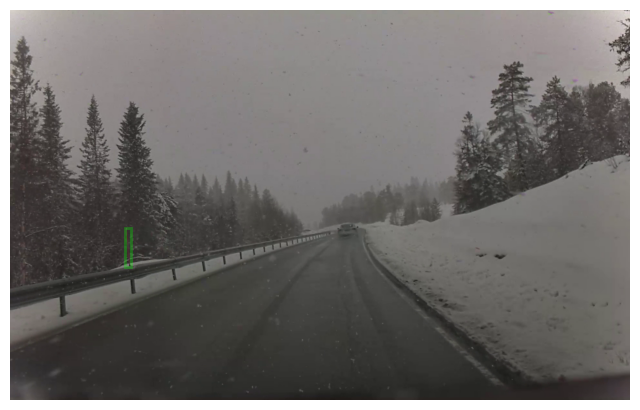

In [51]:
# Visualize one random training image with boxes (roadpoles_v1)
sample_image = random.choice(df_main["image_path"].tolist())
sample_labels = df_main[df_main["image_path"] == sample_image]

img = plt.imread(sample_image)
h, w = img.shape[:2]

fig, ax = plt.subplots(figsize=(8, 6))
ax.imshow(img)

for _, row in sample_labels.iterrows():
    cx, cy, bw, bh = row[["cx", "cy", "w", "h"]]
    cx *= w
    cy *= h
    bw *= w
    bh *= h
    x0 = cx - bw / 2
    y0 = cy - bh / 2
    rect = plt.Rectangle((x0, y0), bw, bh, linewidth=2, alpha=0.3, edgecolor="lime", facecolor="none")
    ax.add_patch(rect)

ax.set_axis_off()
plt.show()

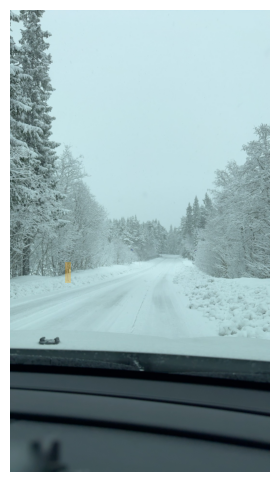

In [79]:
# Visualize one random training image with boxes (Road_poles_iPhone)
sample_image_iphone = random.choice(df_iphone["image_path"].tolist())
sample_labels_iphone = df_iphone[df_iphone["image_path"] == sample_image_iphone]

img = plt.imread(sample_image_iphone)
h, w = img.shape[:2]

fig, ax = plt.subplots(figsize=(8, 6))
ax.imshow(img)

for _, row in sample_labels_iphone.iterrows():
    cx, cy, bw, bh = row[["cx", "cy", "w", "h"]]
    cx *= w
    cy *= h
    bw *= w
    bh *= h
    x0 = cx - bw / 2
    y0 = cy - bh / 2
    rect = plt.Rectangle((x0, y0), bw, bh, linewidth=2, alpha=0.3, edgecolor="orange", facecolor="none")
    ax.add_patch(rect)

ax.set_axis_off()
plt.show()